#SUPPORT VECTOR MACHINE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushroom.csv to mushroom.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('mushroom.csv')

# Display basic information and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

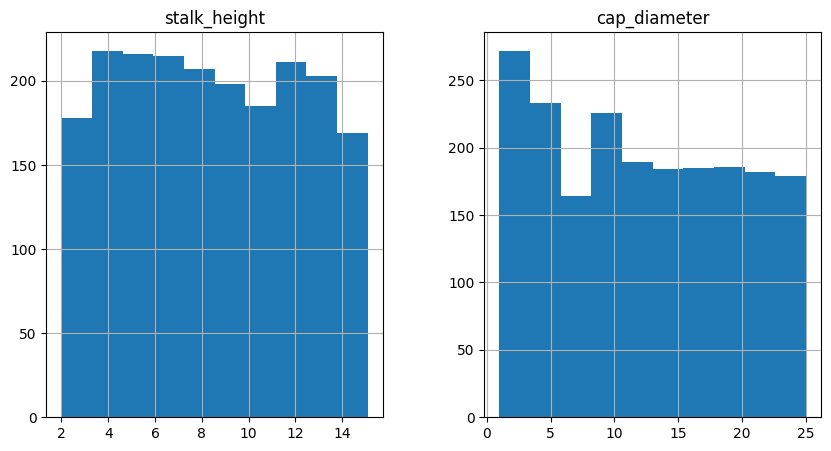

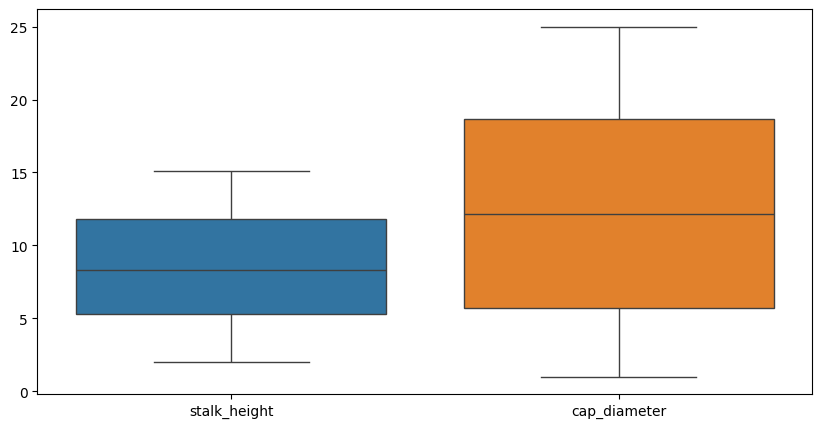

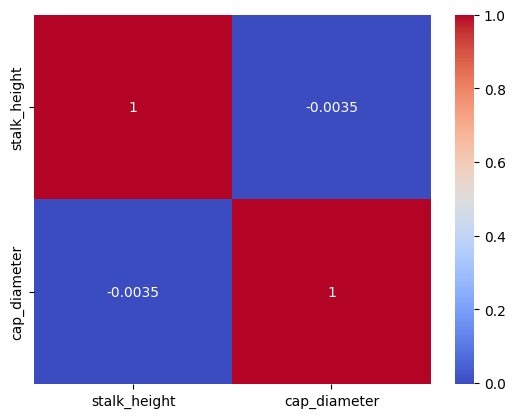

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df[['stalk_height', 'cap_diameter']].hist(figsize=(10, 5))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']])
plt.show()

# Correlation matrix
corr_matrix = df[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Unnamed: 0', 'class'])
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

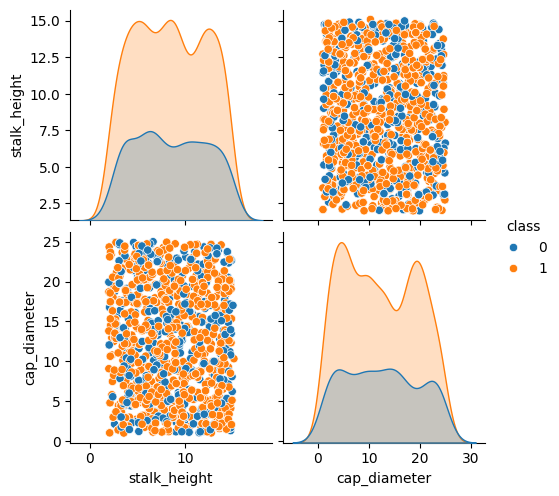

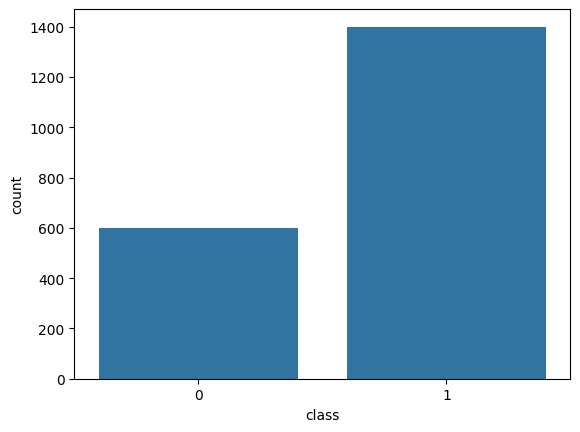

In [ ]:
# Pair plots for numerical features
sns.pairplot(df[['stalk_height', 'cap_diameter', 'class']], hue='class')
plt.show()

# Class distribution
sns.countplot(x='class', data=df)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


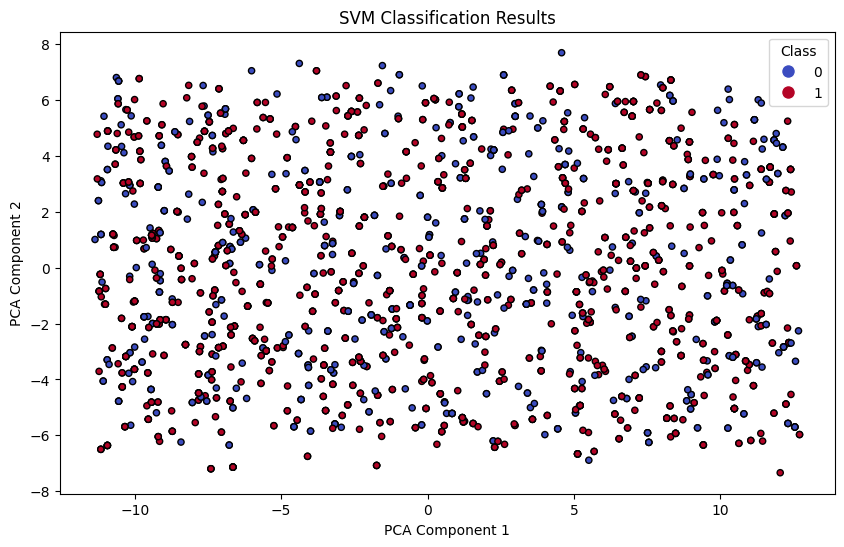

In [ ]:
import numpy as np

# Plot decision boundaries
plt.figure(figsize=(10, 6))

# Create a scatter plot with color mapping
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)

# Create a color map for the labels
unique_labels = np.unique(y)
colors = [scatter.cmap(scatter.norm(i)) for i in range(len(unique_labels))]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=handles, title="Class")
plt.title('SVM Classification Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initi alize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8385714285714286


In [ ]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Performance metrics
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Compare with default SVM model
print("Default SVM Accuracy:", accuracy_score(y_test, y_pred))

Best Model Accuracy: 0.8816666666666667
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.76       185
           1       0.86      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.92      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600

Default SVM Accuracy: 0.6916666666666667


Strengths: SVM is effective in high-dimensional spaces and is versatile with different kernels.

Weaknesses: SVMs can be computationally intensive and may not perform well with noisy datasets.

Practical Implications: SVMs are useful in scenarios where the margin of separation between classes is clear, but may need adjustments for large or noisy datasets.